Posterior mean proportion pulling all-nighters: 0.395
95% credible interval: [0.327, 0.465]


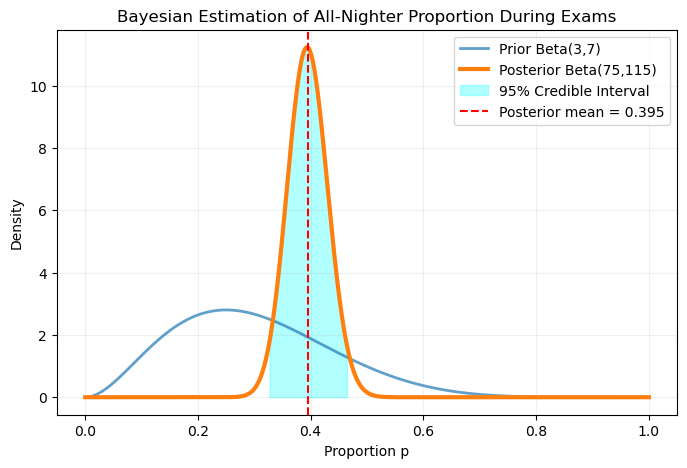

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Data
n = 180          # students surveyed
k = 72           # students admitting to pulling all-nighters

# Prior Beta(3, 7)
prior_alpha = 3
prior_beta = 7

# Posterior parameters (Beta conjugacy)
post_alpha = prior_alpha + k
post_beta = prior_beta + n - k

# Range for proportion p
p = np.linspace(0, 1, 1000)

# PDFs for prior and posterior
prior_pdf = beta.pdf(p, prior_alpha, prior_beta)
posterior_pdf = beta.pdf(p, post_alpha, post_beta)

# Posterior mean and 95% credible interval
post_mean = post_alpha / (post_alpha + post_beta)
ci_lower, ci_upper = beta.ppf([0.025, 0.975], post_alpha, post_beta)

print(f"Posterior mean proportion pulling all-nighters: {post_mean:.3f}")
print(f"95% credible interval: [{ci_lower:.3f}, {ci_upper:.3f}]")

# Plotting
plt.figure(figsize=(8,5))
plt.plot(p, prior_pdf, label='Prior Beta(3,7)', lw=2, alpha=0.7)
plt.plot(p, posterior_pdf, label=f'Posterior Beta({post_alpha},{post_beta})', lw=3)
plt.fill_between(p, 0, posterior_pdf, where=(p >= ci_lower) & (p <= ci_upper),
                 color='cyan', alpha=0.3, label='95% Credible Interval')

plt.axvline(post_mean, color='red', linestyle='--', label=f'Posterior mean = {post_mean:.3f}')

plt.title('Bayesian Estimation of All-Nighter Proportion During Exams')
plt.xlabel('Proportion p')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.2)
plt.show()